In [70]:
import os

import matplotlib.pyplot as plt
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision import transforms

from src.datasets import SatelliteImagesTrainDataset, train_test_split
from src.nets import UNet
from src.path import DATA_TRAIN_PATH, MODELS_DIR, extract_archives

from src.plot_utils import plot_image_mask
# from src.plot_utils import plot_image_mask

In [71]:
NUM_CHANNELS = 3
IMG_WIDTH = 32
IMG_HEIGHT = 32
BATCH_SIZE = 16
NUM_EPOCHS = 100
MODEL_PATH = os.path.join(MODELS_DIR, 'convnet_model.pth')

In [72]:

dataset = SatelliteImagesTrainDataset(
        root_dir=DATA_TRAIN_PATH,
        #image_transform=image_transform,
        #mask_transform=mask_transform,
    )
    

In [79]:
image, mask = dataset[0]
print('Image size:', image.shape)
print('Mask size:', mask.shape)

print(dataset[0][1].shape)

Image size: (400, 400, 3)
Mask size: (400, 400)
(400, 400)


In [ ]:
# plot_image_mask(image, mask)

In [76]:

# importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

In [93]:
#io.imshow(mask)

# Rotation

Rotated image


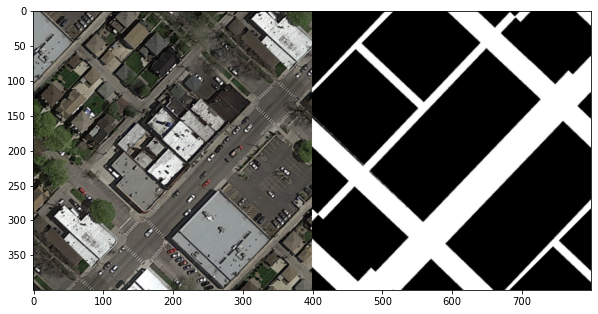

In [86]:
print('Rotated image')
rotated_im = rotate(image,angle =45, mode='wrap')
rotated_mask = rotate(mask,angle =45, mode='wrap')

plot_image_mask(rotated_im, rotated_mask)


# Affine Transform

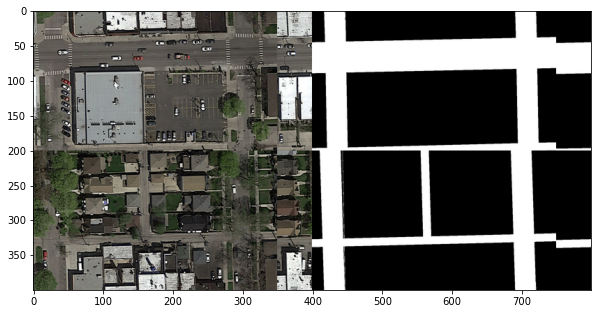

In [91]:
transform = AffineTransform(translation=(50,200))
wrapShift_im = warp(image,transform,mode='wrap')
wrapShift_mask = warp(mask,transform,mode='wrap')

plot_image_mask(wrapShift_im, wrapShift_mask)

# Flipping

Text(0.5, 1.0, 'Left to Right Flipped')

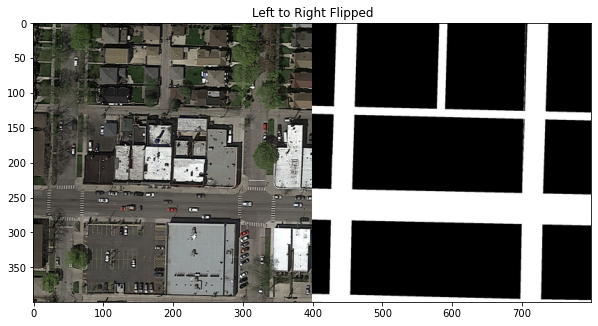

In [92]:
flipLR_im = np.fliplr(image)
flipLR_mask = np.fliplr(mask)

plot_image_mask(flipLR_im,flipLR_mask)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'up down Flipped')

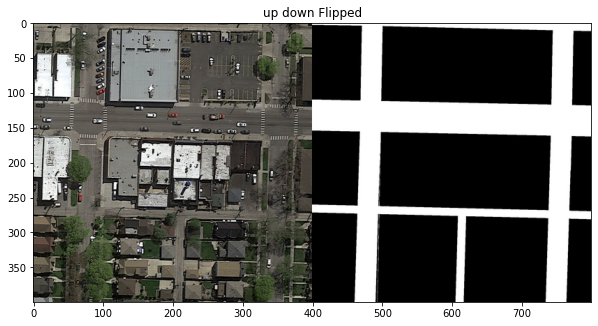

In [111]:
flipUD_im = np.flipud(image)
flipUD_mask = np.flipud(mask)

plot_image_mask(flipUD_im,flipUD_mask);
plt.title('up down Flipped')

# Noise

In [113]:
#standard deviation for noise to be added in the image
#increasing this value will add more noise to the image 
sigma=0.155 
torch.manual_seed(45)

Text(0.5, 1.0, 'Random noise')

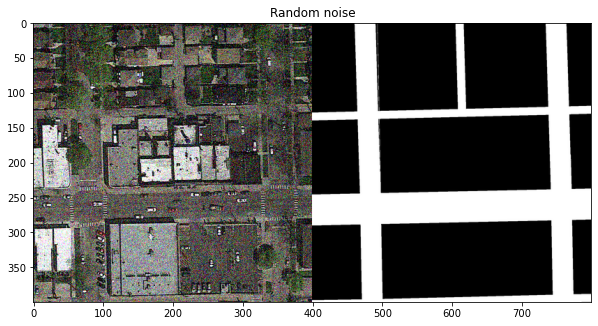

In [114]:
#add random noise to the image
noisyRandom_im = random_noise(image,var=sigma**2)
noisyRandom_mask = mask
plot_image_mask(noisyRandom_im,noisyRandom_mask)
plt.title('Random noise')

# Blurr


Text(0.5, 1.0, 'Blurred')

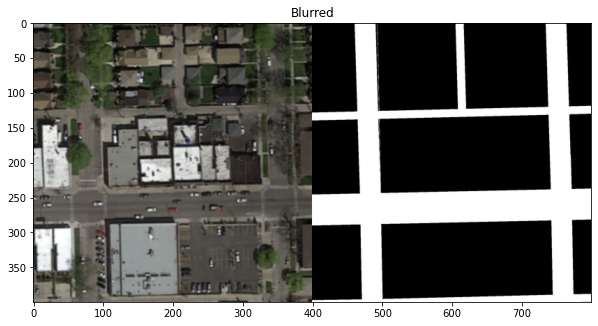

In [112]:
blurred_im = gaussian(image,sigma=1,multichannel=True)
plot_image_mask(blurred_im,mask)
plt.title('Blurred')

AttributeError: 'SatelliteImagesTrainDataset' object has no attribute 'head'